# 📘 Побудова ситуаційного графіка на основі звітів
У цьому проєкті ми:
- Завантажимо бойові звіти з файлу `reports.txt`
- Витягнемо ключову інформацію: дату, напрямок, втрати
- Побудуємо графік змін втрат по датах
- Проаналізуємо найбільш напружені напрямки


In [1]:
# 🔹 Зчитування та парсинг текстового файлу
import pandas as pd

reports = []

with open("reports.txt", "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("|")
        date = parts[0].split(":")[1].strip()
        direction = parts[1].split(":")[1].strip()
        losses = int(parts[2].split(":")[1].strip())
        reports.append({"Дата": date, "Напрямок": direction, "Втрати": losses})

# Створення DataFrame
df = pd.DataFrame(reports)
df["Дата"] = pd.to_datetime(df["Дата"])
df = df.sort_values("Дата")
df

,Дата,Напрямок,Втрати
0,2025-06-01,Північ,137
1,2025-06-02,Південь,63
2,2025-06-03,Північ,131
3,2025-06-04,Південь,147
4,2025-06-05,Схід,80
5,2025-06-06,Захід,53
6,2025-06-07,Схід,93
7,2025-06-08,Північ,140
8,2025-06-09,Схід,106
9,2025-06-10,Схід,116


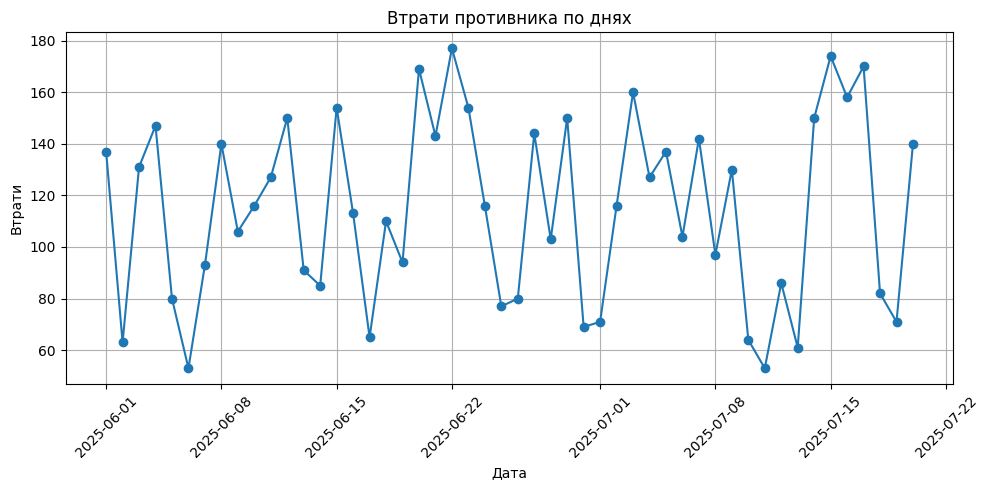

In [2]:
# 🔹 Побудова графіка динаміки втрат
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Дата"], df["Втрати"], marker='o')
plt.title("Втрати противника по днях")
plt.xlabel("Дата")
plt.ylabel("Втрати")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Напрямок
Південь    1751
Північ     1434
Захід      1361
Схід       1184
Name: Втрати, dtype: int64

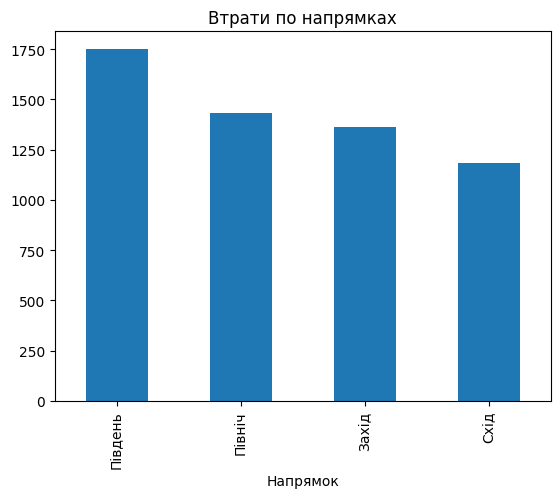

In [3]:
# 🔹 Аналіз найбільш напружених напрямків
summary = df.groupby("Напрямок")["Втрати"].sum().sort_values(ascending=False)
summary.plot(kind="bar", title="Втрати по напрямках")
summary